# Cohort Analysis for Store Retention

## 1. Load the Data

Before we dive into the analysis, let's start by loading our data. We're using Pandas here, which is perfect for handling and analyzing large datasets. We'll load our store and order data from CSV files.

In [1]:
import pandas as pd

# Load store and order data
stores_df = pd.read_csv('../datasets/stores.csv')
orders_df = pd.read_csv('../datasets//orders.csv')

In [2]:
stores_df

,id,slug,city_id,created_at
0,567335,ab-foods-point,1,2016-12-18
1,531342,janta-sweet-house,1,2017-12-31
2,158203,theka-coffee-desi,1,2017-08-19
3,187912,singh-hut,1,2017-05-27
4,543530,grill-masters,1,2017-08-12
...,...,...,...,...
148536,553122,the-food-delight,821,2018-06-27
148537,562647,maitri-foods-beverages,821,2018-12-01
148538,559435,cafe-bella-ciao,821,2018-04-20
148539,418989,grill-zilla,821,2018-01-26


In [3]:
orders_df

,id,type,store_id,created_at
0,1,"Beverages,Pizzas",567335,2017-10-10
1,2,"Sweets,Bakery",531342,2018-05-08
2,3,Beverages,158203,2018-04-06
3,4,"Fast Food,Indian",187912,2018-04-11
4,5,"Italian-American,Fast Food",543530,2018-06-18
...,...,...,...,...
148659,148660,"Fast Food,Snacks",553122,2019-01-22
148660,148661,Pizzas,562647,2019-01-23
148661,148662,"Fast Food,Snacks",559435,2019-01-23
148662,148663,Continental,418989,2019-01-24


## 2. Preprocess the Data
Data isn't always in the format we need. So, let's clean it up!.

In [4]:
stores_df['created_at']

0         2016-12-18
1         2017-12-31
2         2017-08-19
3         2017-05-27
4         2017-08-12
             ...    
148536    2018-06-27
148537    2018-12-01
148538    2018-04-20
148539    2018-01-26
148540    2018-03-22
Name: created_at, Length: 148541, dtype: object

In [5]:
orders_df['created_at']

0         2017-10-10
1         2018-05-08
2         2018-04-06
3         2018-04-11
4         2018-06-18
             ...    
148659    2019-01-22
148660    2019-01-23
148661    2019-01-23
148662    2019-01-24
148663    2019-01-24
Name: created_at, Length: 148664, dtype: object

 We'll convert dates to a proper format and handle any missing values to ensure our dataset is analysis-ready

In [6]:
# Convert date columns to datetime objects
stores_df['created_at'] = pd.to_datetime(stores_df['created_at'])
orders_df['created_at'] = pd.to_datetime(orders_df['created_at'])

# Fill any missing data
stores_df.fillna(method='ffill', inplace=True)


C:\Users\taha\AppData\Local\Temp\ipykernel_14408\2777580981.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  stores_df.fillna(method='ffill', inplace=True)


Let's check our data again

In [7]:
stores_df['created_at']

0        2016-12-18
1        2017-12-31
2        2017-08-19
3        2017-05-27
4        2017-08-12
            ...    
148536   2018-06-27
148537   2018-12-01
148538   2018-04-20
148539   2018-01-26
148540   2018-03-22
Name: created_at, Length: 148541, dtype: datetime64[ns]

In [8]:
orders_df['created_at']

0        2017-10-10
1        2018-05-08
2        2018-04-06
3        2018-04-11
4        2018-06-18
            ...    
148659   2019-01-22
148660   2019-01-23
148661   2019-01-23
148662   2019-01-24
148663   2019-01-24
Name: created_at, Length: 148664, dtype: datetime64[ns]

## 3. Define Cohorts and Calculate Cohort Sizes
Now, let's define our cohorts. A cohort is a group of stores that started at the same time. We'll categorize stores based on their creation month for our analysis.

In [9]:
# Creating a cohort based on the month stores were added
stores_df['Cohort'] = stores_df['created_at'].dt.to_period('M')


In [10]:
stores_df['Cohort'] 

0         2016-12
1         2017-12
2         2017-08
3         2017-05
4         2017-08
           ...   
148536    2018-06
148537    2018-12
148538    2018-04
148539    2018-01
148540    2018-03
Name: Cohort, Length: 148541, dtype: period[M]

## 4. Merge with Transactional Data
Next up, we merge our store data with their corresponding orders. This helps us track how active each store is over time, which is crucial for our retention analysis.

In [11]:
# Merge store data with order data
merged_df = pd.merge(orders_df, stores_df, left_on='store_id', right_index=True)


In [12]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24872 entries, 130 to 148643
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id_x          24872 non-null  int64         
 1   type          24849 non-null  object        
 2   store_id      24872 non-null  int64         
 3   created_at_x  24872 non-null  datetime64[ns]
 4   id_y          24872 non-null  int64         
 5   slug          24872 non-null  object        
 6   city_id       24872 non-null  int64         
 7   created_at_y  24872 non-null  datetime64[ns]
 8   Cohort        24872 non-null  period[M]     
dtypes: datetime64[ns](2), int64(4), object(2), period[M](1)
memory usage: 1.9+ MB


In [13]:
# Rename 'created_at_x' to 'order_date' and 'created_at_y' to 'store_created_at'
merged_df = merged_df.rename(columns={'created_at_x': 'order_date', 'created_at_y': 'store_created_at'})


In [14]:
merged_df

,id_x,type,store_id,order_date,id_y,slug,city_id,store_created_at,Cohort
130,131,Bakery,138890,2019-11-08,123594,hotel-surya-executive,751,2017-07-10,2017-07
131,132,Bakery,138890,2019-02-11,123594,hotel-surya-executive,751,2017-07-10,2017-07
136,137,"Indian,Chinese",137701,2019-11-29,141588,hug-in-hearts,735,2019-02-02,2019-02
137,138,"Indian,Chinese",137701,2019-02-12,141588,hug-in-hearts,735,2019-02-02,2019-02
144,145,South Indian,133352,2020-01-09,155041,kolkata-new-arsalan-biryani-centre,682,2017-07-15,2017-07
...,...,...,...,...,...,...,...,...,...
148638,148639,"Maharashtrian,North Indian",140477,2019-01-11,140409,dinesh-health-kitchen,760,2018-12-25,2018-12
148639,148640,"North Indian,Fast Food",140174,2019-01-11,64621,waffle-house,759,2018-08-07,2018-08
148640,148641,North Indian,140154,2019-01-14,65812,shakti-the-sandwich-shop,759,2018-01-02,2018-01
148642,148643,Fast Food,140158,2019-01-14,580720,zaika-omlette-centre,759,2018-07-24,2018-07


## 5. Calculate Retention
It's crunch time! Let's calculate the retention rate. We want to see how many stores from each cohort continue to be active in the following months.

In [15]:
from operator import attrgetter

# Assign acquisition month cohort
merged_df['OrderMonth'] = merged_df['order_date'].dt.to_period('M')
merged_df['CohortIndex'] = (merged_df['OrderMonth'] - merged_df['Cohort']).apply(attrgetter('n'))

# Create a retention table
cohort_data = merged_df.groupby(['Cohort', 'CohortIndex'])['store_id'].nunique().reset_index()
cohort_count = cohort_data.pivot_table(index='Cohort', columns='CohortIndex', values='store_id')

# Calculate retention as a percentage
cohort_size = cohort_count.iloc[:,0]
retention = cohort_count.divide(cohort_size, axis=0)


## 6. Visualize the Results
Finally, let's make our results easy to understand with a visualization. A heatmap works great here, showing us at a glance how well each cohort retains stores over time.

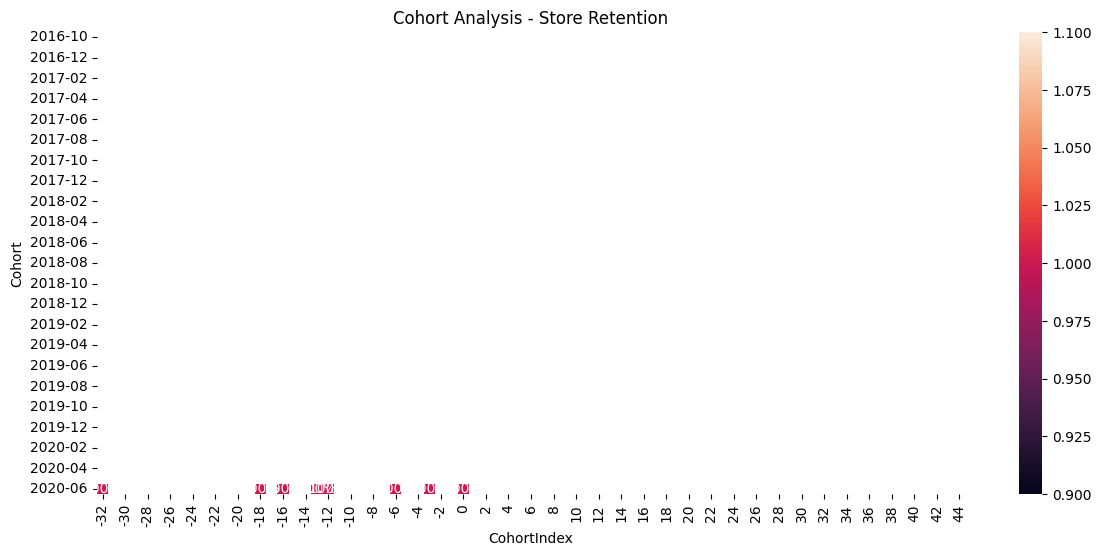

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
sns.heatmap(data=retention, annot=True, fmt='.0%')
plt.title('Cohort Analysis - Store Retention')
plt.show()


And here we have a cohort analysis that provides us valuable insights into how well our stores are being retained over time.